# Notebook Instructions

1. If you are new to Jupyter notebooks, please go through this introductory manual <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank">here</a>.
1. Any changes made in this notebook would be lost after you close the browser window. **You can download the notebook to save your work on your PC.**
1. Before running this notebook on your local PC:<br>
i.  You need to set up a Python environment and the relevant packages on your local PC. To do so, go through the section on "**Run Codes Locally on Your Machine**" in the course.<br>
ii. You need to **download the zip file available in the last unit** of this course. The zip file contains the data files and/or python modules that might be required to run this notebook.

# Other Company Data

In this notebook, you will learn to fetch other company data. The following data are fetched using the `yfinance` package:

1. [Analyst Recommendations](#analyst)
1. [Earnings Calendar](#calendar)
1. [Corporate Actions](#actions)


Note: At times, downloading the data may give you errors due to changes in yahoo finance. 

In such cases, it is recommended to upgrade the `yfinance` package using `pip install --upgrade yfinance`. You can update the 'cell type' for the below from 'Raw NBConvert' to a 'Code' cell. Then restart the kernel and run all of the following cells again.

## Import Libraries

In [1]:
# Import the yfinance library
import yfinance as yf

# Import data manipulation library
import pandas as pd

# Import matplotlib and set the style for plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Import time manipulation library
from datetime import timedelta

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Define the Stock Ticker

Define the stock ticker whose data will be fetched.

In [2]:
# Define the asset ticker for the company
stock_ticker_symbol = 'AAPL'
stock_ticker = yf.Ticker(stock_ticker_symbol)

<a id='analyst'></a> 
## Analyst Recommendations

The analyst recommendations are the views of the various investment bank/advisory firm for the selected stock ticker.

In [3]:
# Analyst recommendations
analyst_recommendations = stock_ticker.get_recommendations()

# Print the last 10 recommendations
analyst_recommendations.tail(10)

,Firm,To Grade,From Grade,Action
Date,,,,
2022-10-28 08:28:10,Keybanc,Overweight,,main
2022-10-28 10:35:31,Citigroup,Buy,,main
2022-10-28 10:39:44,Deutsche Bank,Buy,,main
2022-10-28 11:31:39,Barclays,Equal-Weight,,main
2022-10-28 11:59:30,Credit Suisse,Outperform,,main
2022-10-28 13:19:17,Wedbush,Outperform,,main
2022-11-07 12:39:27,Barclays,Equal-Weight,,main
2022-11-07 13:08:30,B of A Securities,Neutral,,main
2022-11-08 12:14:23,Morgan Stanley,Overweight,,main


<a id='calendar'></a> 
## Earnings Calendar

Earnings dates helps us understand the schedule according to which various publicly-traded companies announce their earnings for a certain period such as a quarter or a year.

In [4]:
# Fetch the earnings calendar of the stock and store it in a DataFrame
earnings_dates = stock_ticker.get_earnings_dates()

# Print the last 5 rows
earnings_dates.head()

,EPS Estimate,Reported EPS,Surprise(%)
Earnings Date,,,
2023-10-25 06:00:00-04:00,NaN,NaN,NaN
2023-07-26 16:00:00-04:00,NaN,NaN,NaN
2023-04-26 06:00:00-04:00,NaN,NaN,NaN
2023-01-25 05:00:00-05:00,1.98,NaN,NaN
2022-10-27 12:00:00-04:00,1.27,1.29,0.0157


The first four dates in the above dataframe correspond to NaN values as they represent the future earnings announcement dates for the asset.

<a id='actions'></a> 
## Corporate Actions

A corporate action is any activity that a company does which brings material impact to its stakeholders. Common corporate actions include the payment of dividends and stock splits.

Dividends are the distribution of a company's earnings to its shareholders. A stock split is an action by which the number of shares of a company is increased by a specified multiple, while the share price is decreased by the same factor as the multiple.

Last 10 corporate actions 
                           Dividends  Stock Splits
Date                                              
2020-08-31 00:00:00-04:00      0.000           4.0
2020-11-06 00:00:00-05:00      0.205           0.0
2021-02-05 00:00:00-05:00      0.205           0.0
2021-05-07 00:00:00-04:00      0.220           0.0
2021-08-06 00:00:00-04:00      0.220           0.0
2021-11-05 00:00:00-04:00      0.220           0.0
2022-02-04 00:00:00-05:00      0.220           0.0
2022-05-06 00:00:00-04:00      0.230           0.0
2022-08-05 00:00:00-04:00      0.230           0.0
2022-11-04 00:00:00-04:00      0.230           0.0


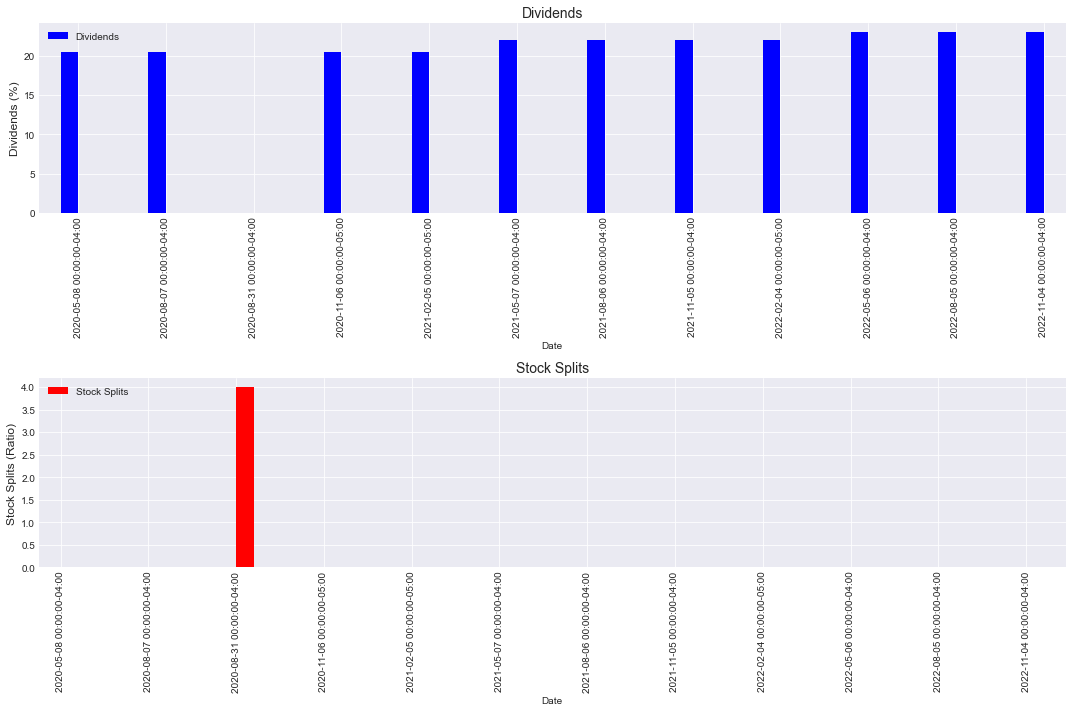

In [5]:
# Corporate actions
corporate_actions = stock_ticker.get_actions()

# Print the last 10 corporate actions
print(f"Last 10 corporate actions \n{corporate_actions.tail(10)}")

# Plot the net income and revenue for the last 3 years
data_to_plot = corporate_actions.tail(12)

# Define the plot figure
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
width = 0.2

# Plot the data
(data_to_plot['Dividends'] * 100).plot(kind='bar', color='blue', ax=ax1, width=width, position=1)
data_to_plot['Stock Splits'].plot(kind='bar', color='red', ax=ax2, width=width, position=0)

# Set title and labels for the plot
ax1.set_ylabel('Dividends (%)', fontsize=12)
ax2.set_ylabel('Stock Splits (Ratio)', fontsize=12)
ax1.set_title('Dividends', fontsize=14)
ax2.set_title('Stock Splits', fontsize=14)
ax1.legend(loc=2)
ax2.legend(loc=2)
plt.tight_layout()
plt.show()

As we can see from the trend, dividends are more common than stock splits. This is because dividends are usually paid every quarter whereas stock splits require special approval from the company's board of directors.

In the upcoming unit, you can refer to additional sources of fundamental stock data. <br><br>